In [3]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [4]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```
python -i  runRandTileTraining.py
```

if pick 10k tiles combo then takes around 3.5 hrs 

3000 tiles combo takes about 2 hrs


In [9]:
df = pd.read_csv("output/tile_combo_metric_area.csv",index_col=0)

In [10]:
df.head()

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,pTprime,Precision,Recall
0,1,[3301 2707 3291 2163 308 3265 2563 3262 185 ...,330,18.333333,0,0,4937.730507,274.318362,8.115292e-10,0.876060,0.850978
1,1,[3112 3263 80 3178 1899 2600 3141 402 2043 ...,615,19.218750,0,0,9781.725465,305.678921,2.089219e-10,0.895784,1.000000
2,1,[2299 3538 2163 1318 3291 2462 3390 1671 180 ...,576,21.333333,0,0,28012.544110,1037.501634,4.440012e-10,0.192433,0.905442
3,1,[2043 3141 2563 2134 2482 1835 1671 1318 3112 ...,416,20.800000,0,0,934.619418,46.730971,8.115292e-10,0.190255,0.034236
4,1,[ 401 180 2134 1558 3396 3301 80 2462 2554 ...,213,17.750000,0,0,396.312214,33.026018,3.818599e-10,0.300040,0.020974


### Compare subset results with individual worker PR 

In [64]:
mega_wlst=[]
mega_plst=[]
mega_rlst=[]
mega_objid=[]
for objid in tqdm(object_lst):
    wlst,plst,rlst = compute_worker_PR_obj(objid,return_worker_id=True)
    mega_objid.extend(objid*np.ones_like(wlst))
    mega_wlst.extend(wlst)
    mega_plst.extend(plst)
    mega_rlst.extend(rlst)

In [65]:
workerPR = pd.DataFrame(zip(mega_objid,mega_wlst,mega_plst,mega_rlst),columns=["objid","worker_id","Precision","Recall"])

In [70]:
for obj in list(set(workerPR.objid)):
    wR = workerPR[workerPR["objid"]==objid].sort(columns=["Recall"])["Recall"]
    rR =  df[df["objid"]==objid].sort(columns=["Recall"])["Recall"]
    list3 = [item1 for w,r in zip(wR,rR) if r>w]

In [98]:
Ppercentage=[]
Rpercentage=[]
for objid in list(set(workerPR.objid)):
    wR = workerPR[workerPR["objid"]==objid].sort(columns=["Recall"])["Recall"]
    rR =  df[df["objid"]==objid].sort(columns=["Recall"])["Recall"]
    Rcount= len([r for r in rR if r>max(wR)])
    Rpercentage.append(Rcount/float(len(rR))*100)
    wP = workerPR[workerPR["objid"]==objid].sort(columns=["Precision"])["Precision"]
    rP =  df[df["objid"]==objid].sort(columns=["Precision"])["Precision"]
    Pcount= len([r for r in rP if r>max(wP)])
    Ppercentage.append(Pcount/float(len(rP))*100)

In [102]:
print mean(Ppercentage)
print mean(Rpercentage)

14.2957446809
2.54822695035


In [19]:
workerPR[workerPR["objid"]==5].sort(columns=["Recall","Precision"],ascending=False).head()

,objid,worker_id,Precision,Recall
178,5,238,0.937722,0.950324
155,5,146,0.937226,0.939745
179,5,240,0.944078,0.933686
170,5,199,0.858543,0.927441
151,5,133,0.893055,0.924260


In [20]:
df.sort(columns=["Recall","Precision"],ascending=False).head()

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
14578,5,[1574 1823 954 3198 1702 2890 3103 1626 1604 ...,1282,35.611111,34.209592,0.950266,5504.311643,152.897546,0.996564,1
12412,5,[ 954 2711 1781 3048 2880 1394 2992 2961 1877 ...,1333,36.027027,35.205228,0.951493,5511.561788,148.961129,0.996484,1
13090,5,[1794 3179 2824 2992 2961 1432 1867 3198 2890 ...,1138,35.562500,30.298149,0.946817,5219.164445,163.098889,0.996474,1
12081,5,[2946 2824 2394 1794 1557 1823 2711 2890 2992 ...,925,35.576923,24.281738,0.933913,5262.286656,202.395641,0.996450,1
13385,5,[3182 2711 2487 1001 2573 1823 1394 2992 3242 ...,1210,35.588235,32.223851,0.947760,5457.648058,160.519061,0.996445,1


In [25]:
workerPR[workerPR["objid"]==12].sort(columns=["Recall","Precision"],ascending=False).head()

,objid,worker_id,Precision,Recall
456,12,2,1.000000,1.000000
420,12,6,0.754620,0.997418
429,12,133,0.834533,0.989076
453,12,233,0.866979,0.981572
425,12,54,0.926036,0.981140


In [24]:
df[df["objid"]==12].sort(columns=["Recall","Precision"],ascending=False).head()

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
35332,12,[1471 2258 1375 3287 2932 2729 3000 3237 1341 ...,881,38.304348,21.334367,0.927581,4305.369444,187.189976,0.994579,1
33163,12,[2777 2809 3287 3052 2942 1212 1016 2840 2877 ...,1202,37.562500,28.495182,0.890474,6494.298063,202.946814,0.990707,1
34093,12,[3000 3237 3248 2942 3257 3106 2840 174 543 ...,1095,36.500000,25.524699,0.850823,6441.237484,214.707916,0.989595,1
35795,12,[1375 2901 3287 2932 2809 3185 2942 3257 1187 ...,1015,37.592593,23.529049,0.871446,6391.852677,236.735284,0.989493,1
34491,12,[1187 3000 2942 2729 2901 184 3185 1212 1876 ...,737,36.850000,17.355011,0.867751,4276.053831,213.802692,0.989081,1


# Correlation between variables

In [11]:
df = df[df["Total gamma value"]!=0]

In [12]:
df["N tiles"] = df["T prime"].apply(lambda x:len(x))

In [13]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,pTprime,Precision,Recall,N tiles
Total Votes,1.000000,0.430161,0.963644,0.351308,0.308626,-0.069693,-0.351208,0.353476,0.665830,0.857602
Average Votes,0.430161,1.000000,0.365509,0.838335,-0.200948,-0.147188,-0.552292,0.730186,0.174105,0.011355
Total gamma value,0.963644,0.365509,1.000000,0.405739,0.350402,-0.055503,-0.290224,0.305146,0.634076,0.864060
Average gamma value,0.351308,0.838335,0.405739,1.000000,-0.154358,-0.166572,-0.408713,0.598474,0.039065,0.009135
Total area,0.308626,-0.200948,0.350402,-0.154358,1.000000,0.553916,0.022607,-0.338283,0.496475,0.512550
Average area,-0.069693,-0.147188,-0.055503,-0.166572,0.553916,1.000000,0.053782,-0.230480,0.165609,-0.000313
pTprime,-0.351208,-0.552292,-0.290224,-0.408713,0.022607,0.053782,1.000000,-0.437092,-0.174756,-0.102559
Precision,0.353476,0.730186,0.305146,0.598474,-0.338283,-0.230480,-0.437092,1.000000,0.233947,0.029946
Recall,0.665830,0.174105,0.634076,0.039065,0.496475,0.165609,-0.174756,0.233947,1.000000,0.688909
N tiles,0.857602,0.011355,0.864060,0.009135,0.512550,-0.000313,-0.102559,0.029946,0.688909,1.000000


<matplotlib.colorbar.Colorbar instance at 0x112ca6638>

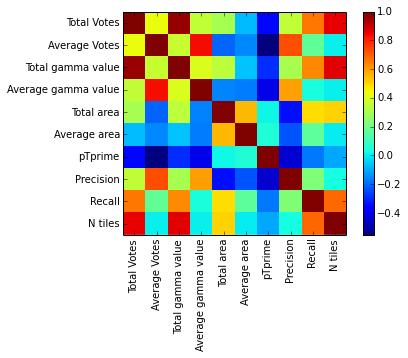

In [15]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,10)
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()

# Regression for ground truth PR

In [16]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area","pTprime"]
# x_attr=df.keys()[2:-2]
print x_attr
y_attr = ["Precision","Recall"]
print y_attr

['Average Votes', 'Average gamma value', 'Total area', 'Average area', 'pTprime']
['Precision', 'Recall']


In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [18]:
msk = np.random.rand(len(df)) < 0.8
Xtrain = df[x_attr][msk].as_matrix()
Xtest = df[x_attr][~msk].as_matrix()
Ytrain = df[y_attr][msk].as_matrix()
Ytest = df[y_attr][~msk].as_matrix()

In [19]:
regr.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtest) - Ytest) ** 2))
print('R^2: %.2f' % regr.score(Xtest, Ytest))

('Coefficients: \n', array([[  2.69822798e-02,  -3.98519821e-02,  -1.48523471e-05,
         -5.11429726e-05,  -1.42541311e+09],
       [  2.35903031e-02,  -6.00653489e-01,   5.22500075e-05,
         -2.51873890e-04,   1.71437477e+07]]))
Mean squared error: 0.06
R^2: 0.47


In [21]:
X = df[x_attr].as_matrix()
Y = df[y_attr].as_matrix()

In [22]:
regr.fit(X,Y)
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[  2.70029741e-02,  -4.21170281e-02,  -1.58187494e-05,
         -3.02420685e-05,  -1.42984298e+09],
       [  2.31077111e-02,  -5.81614653e-01,   4.96523558e-05,
         -1.82840412e-04,  -7.88152418e+07]]))


In [23]:
print np.mean(df["Precision"])
print np.mean(df["Recall"])

0.717713602393
0.511573837494


#### $\therefore$ Average gamma value more important in determining actual PR compared to average area or average votes of the selected tiles , results qualitatively agree with our lossy BB2Tile algorithm

### Regression on Precision and Recall Separately


In [53]:
def regression_results(x_attr,y_attr,PLOT=False):
    regr = linear_model.LinearRegression()
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)

In [29]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area","pTprime"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr)

('Coefficients: \n', array([[  2.69105812e-02,  -3.96526564e-02,  -1.56336120e-05,
         -3.18086181e-05,  -1.45246459e+09]]))
Mean squared error: 0.05
R^2: 0.57


In [30]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area","pTprime"]
y_attr = ["Recall"]
regression_results(x_attr,y_attr)

('Coefficients: \n', array([[  2.32691348e-02,  -5.86667998e-01,   4.99124225e-05,
         -1.94343447e-04,  -4.88625058e+07]]))
Mean squared error: 0.06
R^2: 0.38


# Regression on single x variables separately

('Coefficients: \n', array([[ -3.22319310e+09]]))
Mean squared error: 0.09
R^2: 0.03


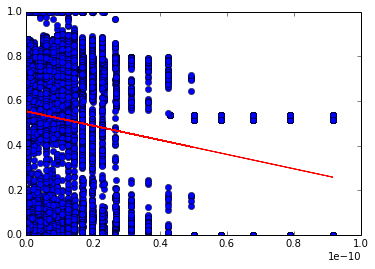

In [49]:
x_attr = ["pTprime"]
y_attr = ["Recall"]
regression_results(x_attr,y_attr,PLOT=True)

('Coefficients: \n', array([[ -8.67219810e+09]]))
Mean squared error: 0.09
R^2: 0.19


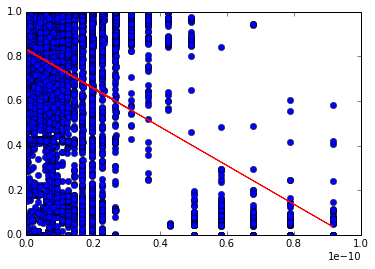

In [51]:
x_attr = ["pTprime"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

('Coefficients: \n', array([[ 0.02941926]]))
Mean squared error: 0.05
R^2: 0.53


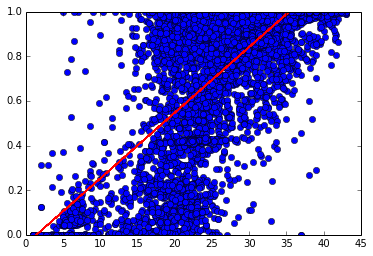

In [54]:
x_attr = ["Average Votes"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

You can't really compare the fitting coefficients because the data attributes are unnormalized, so comparing votes to pTprime is like comparing apples to oranges. You need to somehow use normalized attributes scaled in the same way or just look at the R^2 results